<a href="https://colab.research.google.com/github/Keerthana-glo/EDA-of-Titanic-Dataset/blob/main/keerthana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC DATASET FROM KAGGLE : PART 1**
This is a 'Titanic' dataset downloaded from Kaggle, have performed the following tasks:
1. Some basic investigation and data cleaning such as :
*   An awarness of dataset that we are dealing with on knowing the columns,shape,information,description etc of the dataset.
*  Removing missing values,detecting outliers, and removing unnecessary rows/  columns. 
*  Re-indexing and reformatting our data 

2. Univariate Analysis :
Where we analyze data of just one variable. A variable in your dataset refers to a single column. 
*   Histograms: Bar plots in which the frequency of data is represented with rectangle bars. 
*   Box-plots: Here the information is represented in the form of boxes.

3. Bivariate Analysis :
It is of three main types and they are as follows, 
*   Numeric-Numeric Analysis ; When both the variables being compared have numeric data, the analysis is said to be Numeric-Numeric Analysis. To compare two numeric columns, we can use the following : 
• Scatter plot.
• Pair plot.
• Correlation matrix.
*   Numeric-Categorical Analysis ; When one variable is of numeric type and another is a categorical variable,we perform numeric-categorical analysis.
• On using groupby() function we can arrange the data into similar groups.
* Categorical — Categorical Analysis ; When both the variables contain categorical data, you perform categorical-categorical analysis. First, convert the categorical response column into a numerical column with 1 corresponding to a positive response and 0 corresponding to a negative response.

So basically, we use two variables and compare them by which we can actually find how one feature affects the other.

By this,we can try to make our data get ready for selecting an appropriate model for our prediction. 




In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [16]:
Data=pd.read_csv('/content/Titanic Dataset.csv')

In [17]:
Data.shape 

(418, 13)

In [18]:
Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 12'],
      dtype='object')

In [19]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Unnamed: 12
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,0.0
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,NaN
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,NaN
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,NaN
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,NaN
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,NaN
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,NaN
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,NaN


In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


## **Data Cleaning :**

In [7]:
Data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Unnamed: 12     True
dtype: bool

In [8]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Unnamed: 12    418
dtype: int64

In [9]:
data=Data.drop(['Cabin','Unnamed: 12','Name'],axis=1) 

In [10]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,NaN,0,0,359309,8.0500,S


In [100]:
isnull=data.isnull().any()

In [12]:
data['Fare'].fillna(0,inplace=True) 

In [21]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S


### **Outlier Detection :**

In [75]:
fig=px.box(data,y='Fare')  
fig

In [110]:
fig=px.histogram(data,x='Fare')  
fig

In [62]:
fig=px.scatter(x=data['Fare'],y=data['Age'])
fig

## **Uni-Variate Analysis :**

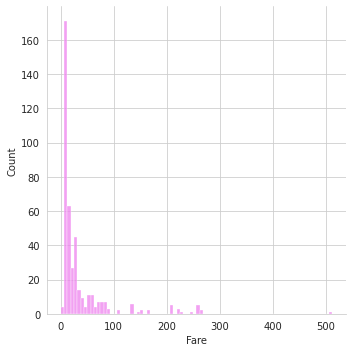

In [43]:
sns.displot(data['Fare'],color='Violet')

In [48]:
data['SibSp'].count() 

418

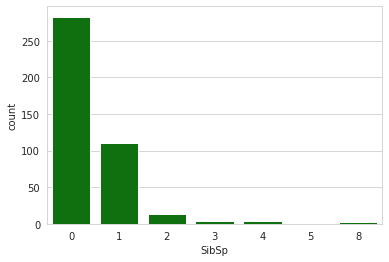

In [47]:
sns.countplot(x='SibSp',data=data,color='Green')

## **Bi-Variate Data Analysis :**

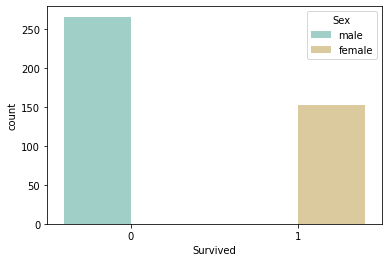

In [32]:
sns.countplot(x='Survived',data=data,hue='Sex',palette='BrBG_r')

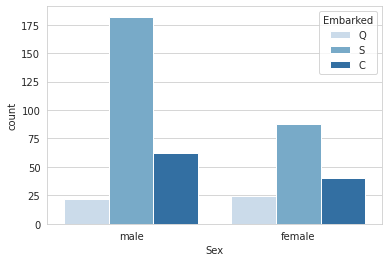

In [40]:
sns.countplot(x='Sex',data=data,hue='Embarked',palette='Blues')

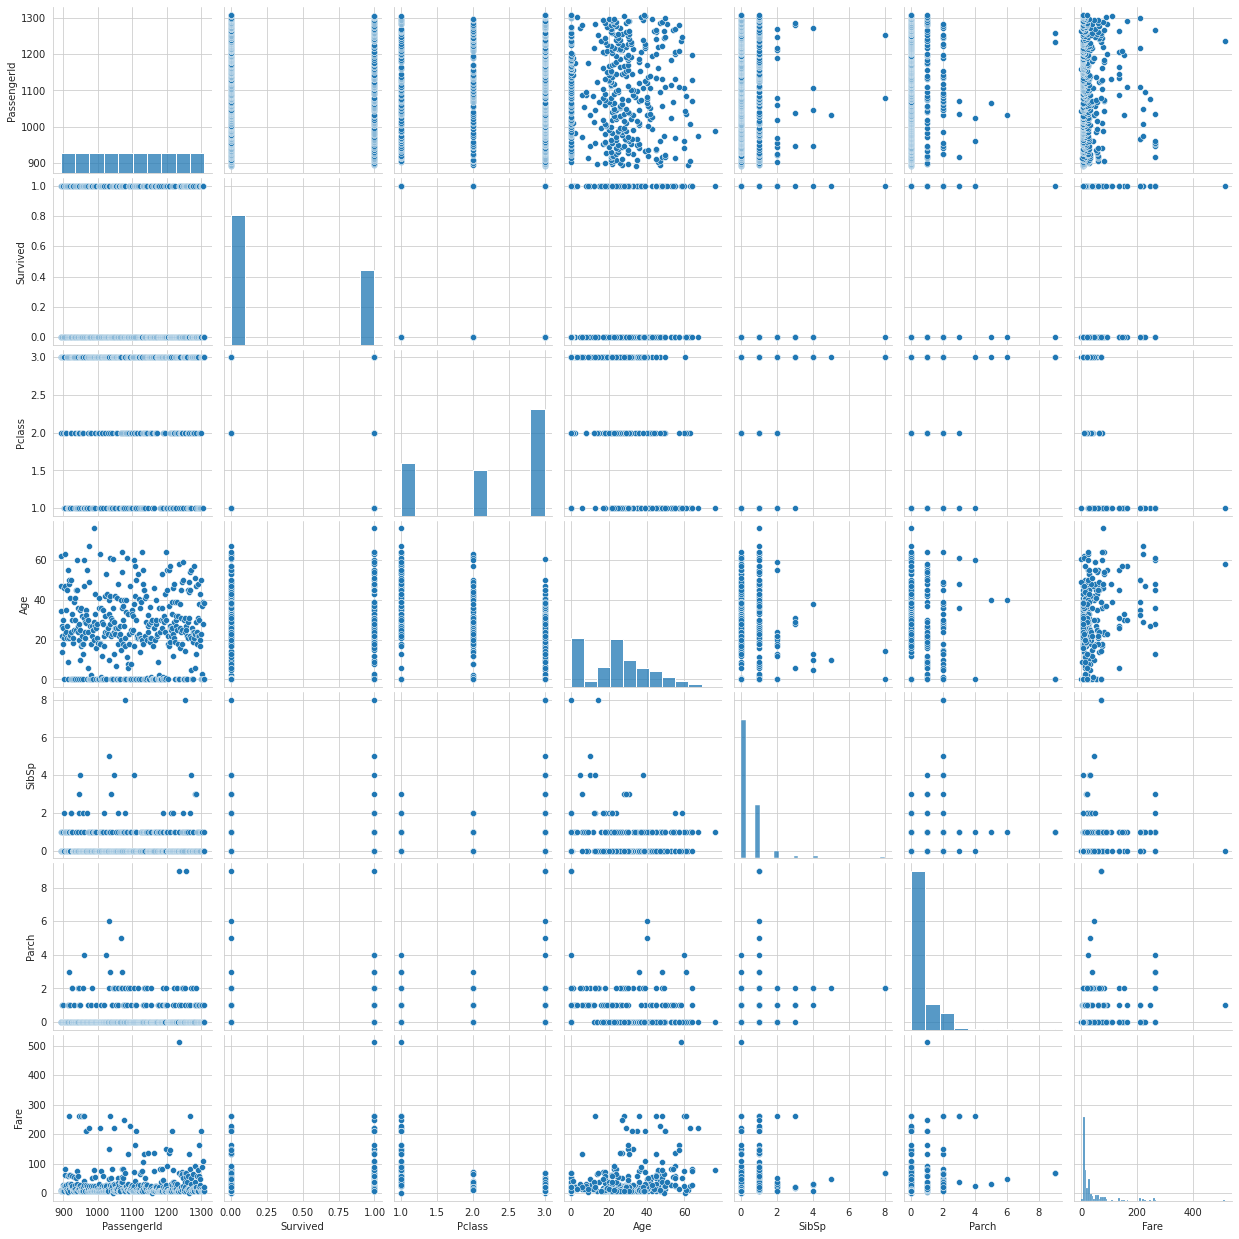

In [81]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



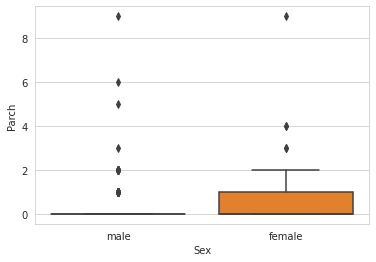

In [87]:
sns.boxplot(data.Sex,data.Parch)
plt.show()

In [83]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

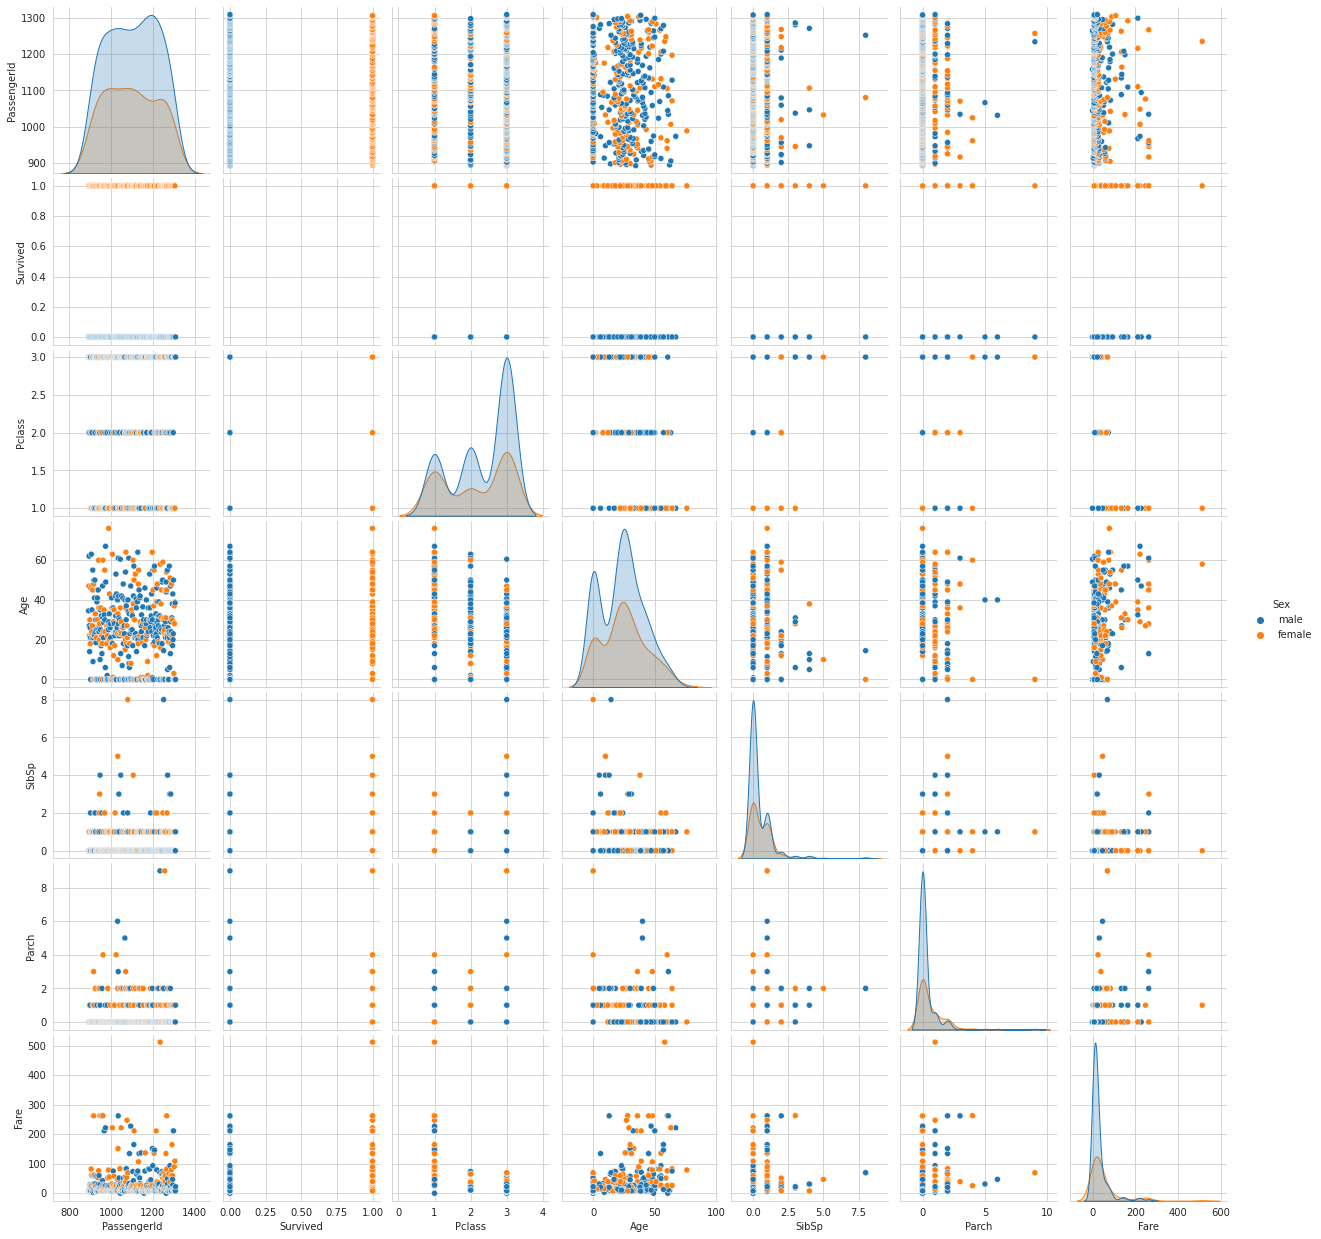

In [82]:
sns.pairplot(data,hue='Sex')

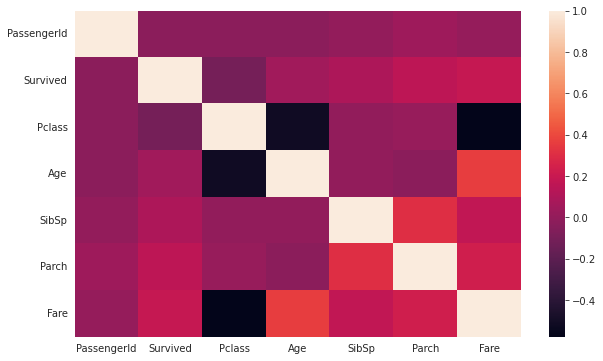

In [108]:
correlation_matrix=data.corr() 
fig=plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix)
plt.show()

Performing an Exploratory Data Analysis allows data scientists to detect errors, debunk assumptions, and much more to ultimately select an appropriate predictive model. 
The primary objective of EDA is to uncover the underlying structure of the given dataset. The structure of a data sets determines the trends, patterns and relationships among them.
                                                                             Hence it is very important to take deep and exhaustive look into the data set through analytical lens. 

**TO BE CONTINUED IN PART 2 - - -**                  
(*The Machine Learning Part*)                                                           